In [29]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path= '/content/drive/MyDrive/seeds.data'
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            ' groove.']
df = pd.read_csv(path,header=None,names=features + ['target'])
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data',header=None)
display(df)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove.,target
0,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
1,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
...,...,...,...,...,...,...,...,...
206,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
207,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
208,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [35]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[1:,[0,1,2,3,4,5,6]].values, df.iloc[1:, 7].values
X=X.astype('float64')
y=y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=0)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
display(X)
X_test_std = sc.transform(X_test)

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [36]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
 mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
 print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [-0.1879 -0.2128  0.3841 -0.2898 -0.0381 -0.7054 -0.6677]

MV 2: [1.2157 1.2234 0.5279 1.1883 1.1263 0.1    1.2561]

MV 3: [-1.0278 -1.0106 -0.912  -0.8984 -1.0882  0.6054 -0.5884]



In [37]:
d = 7 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
 class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
 row, mv = row.reshape(d, 1), mv.reshape(d, 1)
 class_scatter += (row - mv).dot((row - mv).T)
 S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 7x7


In [38]:
print('Class label distribution: %s'% np.bincount(y_train)[1:])

Class label distribution: [49 49 49]


In [39]:
d = 7 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
 class_scatter = np.cov(X_train_std[y_train==label].T)
 S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 7x7


In [40]:
mean_overall = np.mean(X_train_std, axis=0)
d = 7 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
 n = X_train_std[y_train == i + 1, :].shape[0]
 mean_vec = mean_vec.reshape(d, 1) # make column vector
 mean_overall = mean_overall.reshape(d, 1)
 S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 7x7


In [41]:
eigen_vals, eigen_vecs =np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [42]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
 print(eigen_val[0])

Eigenvalues in descending order:

346.27568395450766
174.2675300817408
4.08282924769533e-12
1.5769012904668038e-12
5.864270733740143e-13
1.1773415591538592e-13
2.8751793398132914e-14


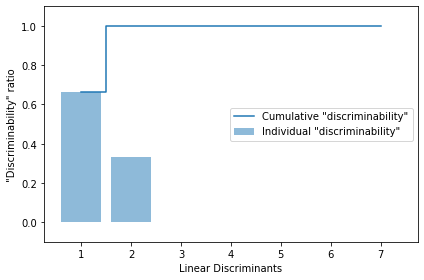

In [44]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 8), discr, alpha=0.5, align='center',label='Individual "discriminability"')
plt.step(range(1, 8), cum_discr, where='mid',label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [45]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.5348 -0.708 ]
 [ 0.8027  0.6439]
 [ 0.0607  0.1104]
 [-0.2095  0.1891]
 [ 0.0639 -0.0088]
 [-0.004  -0.0179]
 [ 0.1339 -0.1894]]


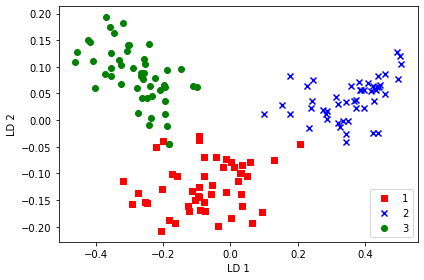

In [46]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
 plt.scatter(X_train_lda[y_train==l, 0],
 X_train_lda[y_train==l, 1] * (-1),
 c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [47]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [48]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 #setup marker generator and color map
 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot examples by class
 for idx, cl in enumerate(np.unique(y)):
   plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

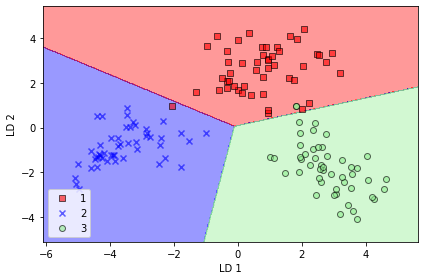

In [49]:
lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

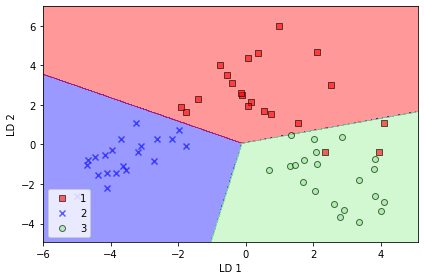

In [50]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [54]:
#Recommendation: 
#The first principal component (PC1) alone accounts for approximately 65 percent of the variance.
#The secpnd principal component (PC2) alone accounts for approximately 35 percent of the variance.
# As PC1 & PC2 combinedly account for almost 100 percent of the variance, the wheatseed dataset can be transformed to 2 features (lower dimension)subspace.
# Thus, we have created a 7 × 2-dimensional projection matrix, W, from the top two eigenvectors.